4. Write a program to implement linear regression using gradient descent and visualize the relationship between mean squared error and bias with weight. 

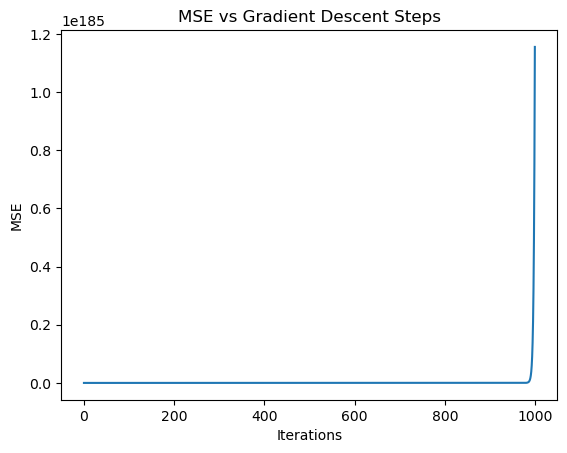

Final Weight: -1.1777719871821254e+92 Bias: -3.262239548149007e+91 MSE: 1.1555083827910735e+185


In [1]:
import numpy as np, matplotlib.pyplot as plt

# dataset
X = np.array([1,2,3,4,5])
y = np.array([1,2,3,3.75,2.25])

# gradient descent
w,b,lr,epochs = 0,0,0.01,1000
errors=[]
for _ in range(epochs):
    y_pred = w*X+b
    error = y - y_pred
    w += lr * (-2*np.sum(X*error)/len(X))
    b += lr * (-2*np.sum(error)/len(X))
    errors.append(np.mean(error**2))

# plot MSE vs iterations
plt.plot(errors)
plt.xlabel("Iterations"); plt.ylabel("MSE")
plt.title("MSE vs Gradient Descent Steps")
plt.show()

print("Final Weight:",w,"Bias:",b,"MSE:",errors[-1])


5. Write a program to perform exploratory data analysis with Python using correlation covariance matrix Euclidean distance matrix Eigen values and eigenvectors pair plot matrix. 

Correlation:
           X         Y         Z
X  1.000000  0.774597 -0.900000
Y  0.774597  1.000000 -0.645497
Z -0.900000 -0.645497  1.000000

Covariance:
       X     Y     Z
X  2.50  1.50 -2.25
Y  1.50  1.50 -1.25
Z -2.25 -1.25  2.50

Euclidean Distance Matrix:
 [[0.         3.         3.74165739 4.69041576 6.40312424]
 [3.         0.         1.73205081 2.23606798 3.74165739]
 [3.74165739 1.73205081 0.         2.44948974 3.60555128]
 [4.69041576 2.23606798 2.44948974 0.         1.73205081]
 [6.40312424 3.74165739 3.60555128 1.73205081 0.        ]]

Eigenvalues:
 [5.66017895 0.18568359 0.65413746] 
Eigenvectors:
 [[ 0.65015617  0.7594767  -0.02218324]
 [ 0.42388685 -0.33833218  0.84014955]
 [-0.6305687   0.5556316   0.54190094]]


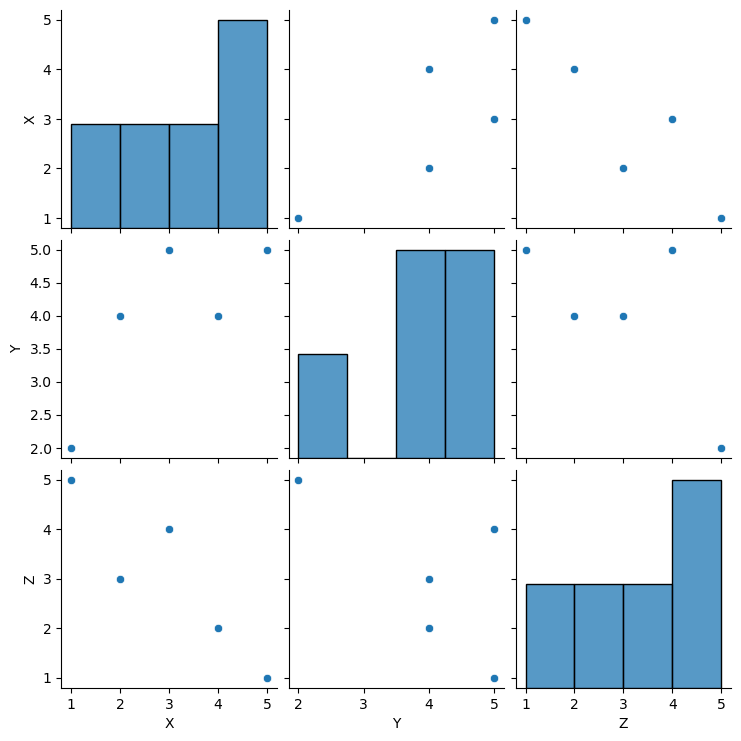

In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

# sample dataset
df = pd.DataFrame({"X":[1,2,3,4,5],
                   "Y":[2,4,5,4,5],
                   "Z":[5,3,4,2,1]})

print("Correlation:\n", df.corr())
print("\nCovariance:\n", df.cov())

# Euclidean distance matrix
dist = np.linalg.norm(df.values[:,None]-df.values, axis=2)
print("\nEuclidean Distance Matrix:\n", dist)

# Eigen decomposition of covariance
eig_vals, eig_vecs = np.linalg.eig(df.cov())
print("\nEigenvalues:\n", eig_vals, "\nEigenvectors:\n", eig_vecs)

# Pair plot
sns.pairplot(df); plt.show()


6. Demonstrate polynomial regression leads to over fitting

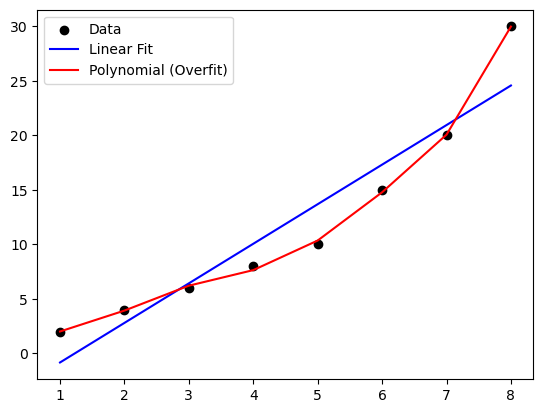

In [3]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# dataset
X = np.array([1,2,3,4,5,6,7,8]).reshape(-1,1)
y = np.array([2,4,6,8,10,15,20,30])  # not perfectly linear

# Linear Regression
lin = LinearRegression().fit(X,y)
y_lin = lin.predict(X)

# Polynomial Regression (degree=6)
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression().fit(X_poly,y)
y_poly = poly_reg.predict(X_poly)

# Plot
plt.scatter(X,y,color='black',label="Data")
plt.plot(X,y_lin,color='blue',label="Linear Fit")
plt.plot(X,y_poly,color='red',label="Polynomial (Overfit)")
plt.legend(); plt.show()


7. Show how polynomial models of increasing degree exhibit bias variance trade-off with training and validation error curves

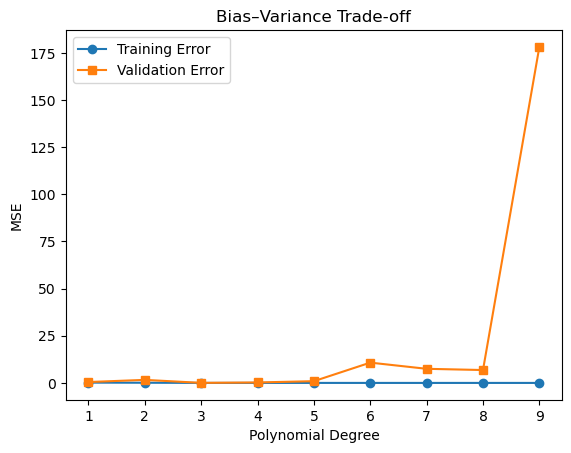

In [4]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# synthetic dataset
X = np.linspace(0,1,20).reshape(-1,1)
y = np.sin(2*np.pi*X).ravel() + np.random.randn(20)*0.1
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=0)

train_err, val_err = [], []
degrees = range(1,10)

for d in degrees:
    poly = PolynomialFeatures(d)
    Xtr, Xv = poly.fit_transform(X_train), poly.transform(X_val)
    model = LinearRegression().fit(Xtr,y_train)
    train_err.append(mean_squared_error(y_train, model.predict(Xtr)))
    val_err.append(mean_squared_error(y_val, model.predict(Xv)))

plt.plot(degrees, train_err, 'o-', label="Training Error")
plt.plot(degrees, val_err, 's-', label="Validation Error")
plt.xlabel("Polynomial Degree"); plt.ylabel("MSE")
plt.title("Bias–Variance Trade-off")
plt.legend(); plt.show()


# 8. Generate mesh grid that fits into generalizable tool

This program defines a generalizable mesh grid function that works with any 2D dataset.

It’s widely used in ML for decision boundary visualization or creating function surfaces.

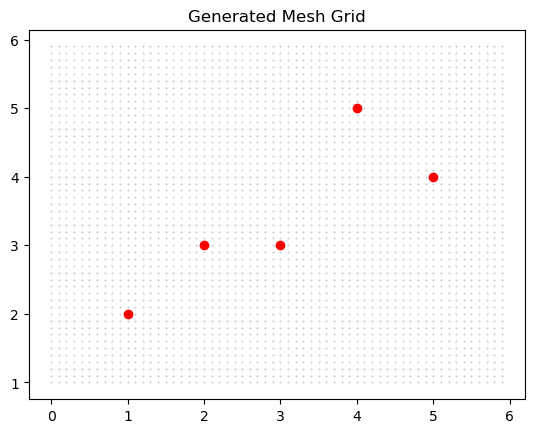

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(X, h=0.1, pad=1):
    """Generate mesh grid for given 2D dataset X"""
    x_min, x_max = X[:,0].min() - pad, X[:,0].max() + pad
    y_min, y_max = X[:,1].min() - pad, X[:,1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

# Example usage
X = np.array([[1,2],[2,3],[3,3],[4,5],[5,4]])  # 2D dataset
xx, yy = make_meshgrid(X)

plt.scatter(X[:,0], X[:,1], color='red')
plt.plot(xx,yy,'k.',markersize=1,alpha=0.2)  # mesh points
plt.title("Generated Mesh Grid")
plt.show()


# 9.Generate swiss roll for a random dataset

A colorful 3D scatter plot shaped like a Swiss Roll (spiral sheet).

Colors indicate progression along the roll.


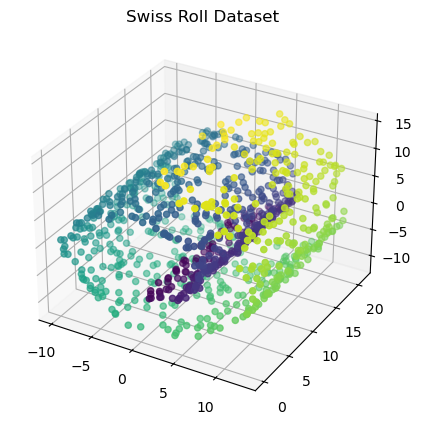

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

# generate swiss roll dataset
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# 3D visualization
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap=plt.cm.viridis)
ax.set_title("Swiss Roll Dataset")
plt.show()


# 10. Programs to demonstrate KNN

This program implements KNN on the Iris dataset and evaluates accuracy.

KNN predicts labels based on the closest neighbors in the feature space.

KNN Accuracy: 0.9777777777777777


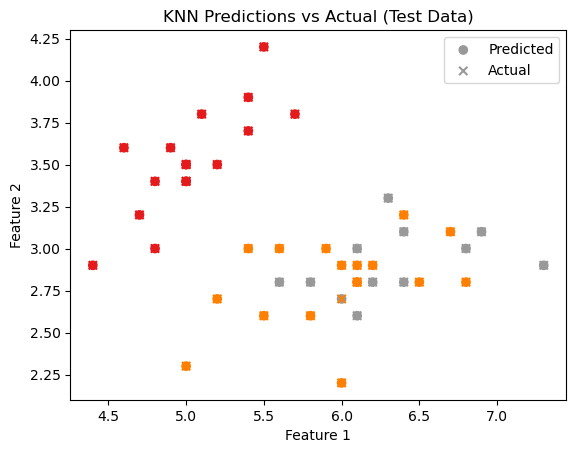

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))





import matplotlib.pyplot as plt

# Plot test data with predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.Set1, marker='o', label="Predicted")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, marker='x', label="Actual")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Predictions vs Actual (Test Data)")
plt.legend(["Predicted", "Actual"])
plt.show()



 # Random forest

 This program trains a Random Forest classifier using multiple decision trees.

It reduces overfitting and improves accuracy through ensemble learning.

Random Forest Accuracy: 0.9777777777777777


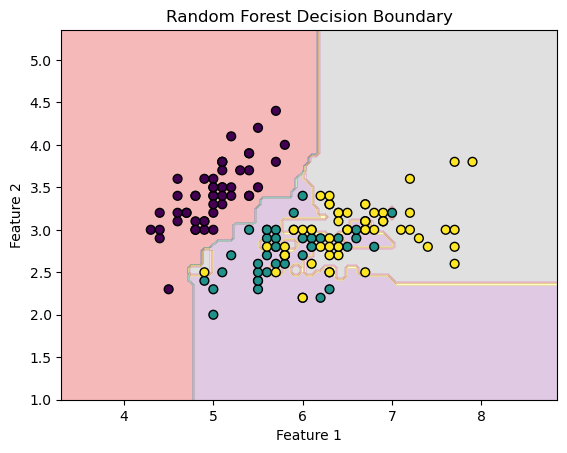

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))





import matplotlib.pyplot as plt
import numpy as np

# Use only first 2 features for plotting
X_plot, y_plot = X[:, :2], y
rf.fit(X_plot, y_plot)  # retrain on 2D data for visualization

# Mesh grid
x_min, x_max = X_plot[:,0].min() - 1, X_plot[:,0].max() + 1
y_min, y_max = X_plot[:,1].min() - 1, X_plot[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary and points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_plot[:,0], X_plot[:,1], c=y_plot, edgecolor="k", s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random Forest Decision Boundary")
plt.show()



# Decision tree

This program builds a Decision Tree classifier on the Iris dataset.

Decision Trees split features recursively to classify data based on feature rules.

Decision Tree Accuracy: 0.9777777777777777


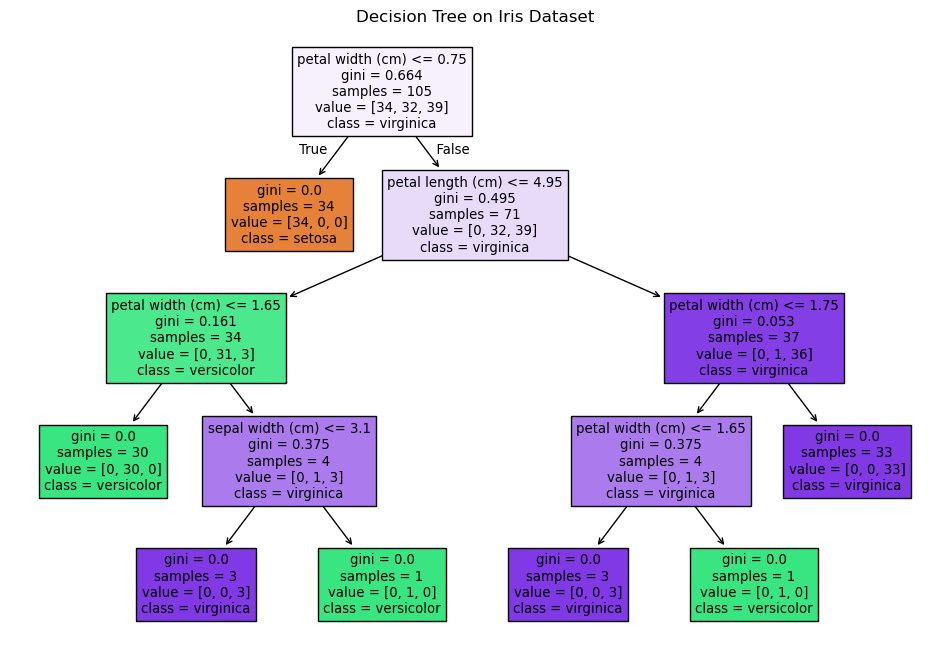

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(dt, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.title("Decision Tree on Iris Dataset")
plt.show()



# Confusion matrix.

This program generates a Confusion Matrix to evaluate classification performance.

It shows true positives, false positives, true negatives, and false negatives for each class.

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### SVM

In [15]:
# SVM for Classification

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]   # Take first 2 features for easy visualization
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("confussion matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))



Classification Accuracy: 0.7333333333333333
confussion matrix: [[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.54      0.54      0.54        13
           2       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45



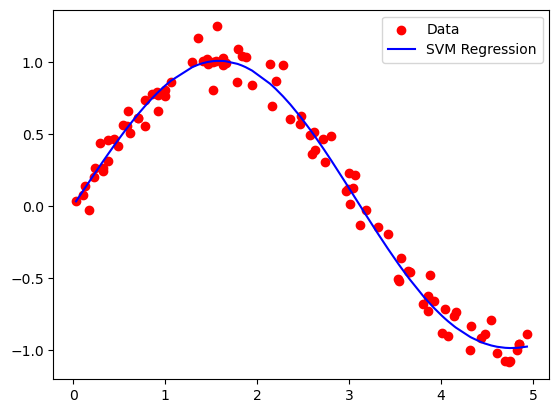

In [2]:
# SVM for Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # add noise

# Train SVM Regressor
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X, y)

# Predictions
y_pred = svr.predict(X)

# Plot
plt.scatter(X, y, color='red', label='Data')
plt.plot(X, y_pred, color='blue', label='SVM Regression')
plt.legend()
plt.show()


In [ ]:
import numpy as np

#1
x1 = np.array([2, 3])
x2 = np.array([4, 1])  


diff = x2 - x1  


w = diff  
print("Normal vector (w):", w)


midpoint = (x1 + x2) / 2
print("Midpoint:", midpoint)

# Equation of hyperplane: w . (x - midpoint) = 0 → w.x + b = 0
b = -np.dot(w, midpoint)
print(f"Equation of hyperplane: {w[0]}*x1 + {w[1]}*x2 + {b} = 0")



# 2
w = np.array([3, 4])
margin = 1 / np.linalg.norm(w)
print("Margin of classifier:", margin)



# Problem 3: Support Vectors and Decision Boundary

w = np.array([1, -2])
b = 1

# a) Decision boundary equation
print(f"Decision boundary: {w[0]}*x1 + {w[1]}*x2 + {b} = 0")

# b) Distance of point (2,3) from boundary
x = np.array([2, 3])
distance = abs(np.dot(w, x) + b) / np.linalg.norm(w)
print("Distance from (2,3) to decision boundary:", distance)



# Problem 4: Classification

w = np.array([1, 1])
b = -3
x = np.array([2, 1])

decision_value = np.dot(w, x) + b
predicted_class = 1 if decision_value >= 0 else -1
print("Decision function value:", decision_value)
print("Predicted class:", predicted_class)


Normal vector (w): [ 2 -2]
Midpoint: [3. 2.]
Equation of hyperplane: 2*x1 + -2*x2 + -2.0 = 0
Margin of classifier: 0.2
Decision boundary: 1*x1 + -2*x2 + 1 = 0
Distance from (2,3) to decision boundary: 1.3416407864998738
Decision function value: 0
Predicted class: 1
